### 데이터셋 살펴보기

In [1]:
import numpy as np
import sklearn
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

print(type(iris), dir(iris))
#iris의 type
#객체가 어떤 변수와 메서드를 가졌는지 출력

<class 'sklearn.utils.Bunch'> ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
iris_data = iris.data
iris_label = iris.target

print(iris_data.shape)
#150개의 데이터가 4개의 정보를 담고 있음

(150, 4)


In [4]:
iris.feature_names
#이를 통해 4개의 정보가 sepal length, sepal width, petal length, petal width임을 알 수 있음

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

#target은 setosa, versicolor, virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
print(iris.DESCR)

#데이터셋 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터 준비

In [7]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df
#DataFrame 자료형으로 변환

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris_df["label"] = iris.target
iris_df
#label 컬럼 추가

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7,
                                                    shuffle=True)

#훈련 데이터와 테스트 데이터 분리

In [10]:
X_train.shape, y_train.shape

#분리된 훈련 데이터 shape 

((120, 4), (120,))

In [11]:
X_test.shape, y_test.shape

#분리된 테스트 데이터 shape

((30, 4), (30,))

### 의사결정 나무 학습

In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train)

#의사결정 나무 모델로 학습

DecisionTreeClassifier(random_state=32)

[Text(0.4, 0.9, 'X[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [43, 38, 39]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]'),
 Text(0.6, 0.7, 'X[3] <= 1.7\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(0.4, 0.5, 'X[2] <= 5.0\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6, 0.3, 'X[0] <= 6.05\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

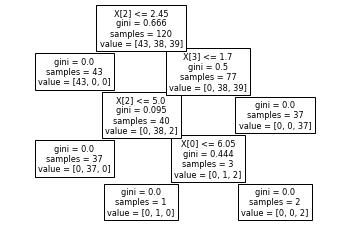

In [13]:
from sklearn import tree
tree.plot_tree(decision_tree)

#시각화

In [14]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

#테스트 데이터 예측 및 레포트

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

